<a href="https://colab.research.google.com/github/ami29839/slo2k21/blob/main/UTS_AryaMaulanaI_2101202079(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab

/content/drive/MyDrive/Colab


In [3]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from PIL import ImageFilter
from imutils import paths
import numpy as np
import os

In [4]:
print("(INFO) loading images...")
imagePaths=paths.list_images("3scene")
data=[]
labels=[]

(INFO) loading images...


In [5]:
for imagePath in imagePaths:
  image=Image.open(imagePath)
  image=image.filter(ImageFilter.SMOOTH)
  image = image.filter(ImageFilter.SMOOTH_MORE)
  image=np.array(image.resize((128,128))) / 255.0
  data.append(image)
  label=imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [6]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [7]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)

In [8]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [9]:
print(np.array(data).shape)

(948, 128, 128, 3)


In [10]:
(trainX, testX, trainY, testY)=train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [11]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D
model=Sequential(
    [
     Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu'),
     MaxPooling2D(2, 2),
     Flatten(),
     #Flatten(input_shape=(128*128*3,)),
     #Dense(2048, activation="relu"),
     #Dropout(0.5),
     Dense(1024, activation="relu"),
     Dropout(0.3),
     Dense(512, activation="relu"),
     Dropout(0.2),
     Dense(256, activation="relu"),
     Dropout(0.2),
     Dense(128, activation="relu"),
     Dropout(0.2),
     Dense(64, activation="relu"),
     Dropout(0.2),
     Dense(32, activation="relu"),
     Dropout(0.2),
     #Dense(16, activation="relu"),
     #Dropout(0.2),
     #Dense(8, activation="relu"),
     #Dropout(0.2),
     #Dense(4, activation="relu"),
     Dense(3, activation="softmax"),
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 254016)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              260113408 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [13]:
print("(INFO) training network.....")
opt = Adam(lr=1e-3, decay=1e-3 )
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=200)

(INFO) training network.....
Epoch 1/100
4/4 [==============================] - 5s 485ms/step - loss: 4.9575 - accuracy: 0.3618 - val_loss: 1.3680 - val_accuracy: 0.3122
Epoch 2/100
4/4 [==============================] - 1s 202ms/step - loss: 2.9227 - accuracy: 0.3466 - val_loss: 1.1457 - val_accuracy: 0.3840
Epoch 3/100
4/4 [==============================] - 1s 192ms/step - loss: 1.7379 - accuracy: 0.3962 - val_loss: 1.0807 - val_accuracy: 0.4135
Epoch 4/100
4/4 [==============================] - 1s 204ms/step - loss: 1.5318 - accuracy: 0.3115 - val_loss: 1.1126 - val_accuracy: 0.3755
Epoch 5/100
4/4 [==============================] - 1s 202ms/step - loss: 1.2264 - accuracy: 0.3366 - val_loss: 1.0867 - val_accuracy: 0.3840
Epoch 6/100
4/4 [==============================] - 1s 200ms/step - loss: 1.1338 - accuracy: 0.3468 - val_loss: 1.0803 - val_accuracy: 0.3713
Epoch 7/100
4/4 [==============================] - 1s 199ms/step - loss: 1.1087 - accuracy: 0.3464 - val_loss: 1.0825 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


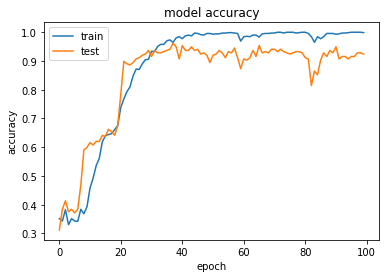

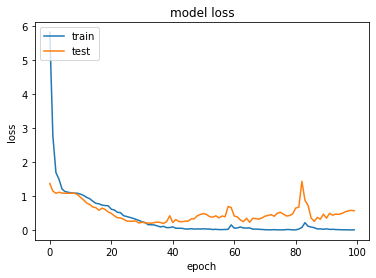

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.94      0.88      0.91        91
      forest       0.95      1.00      0.97        72
     highway       0.88      0.91      0.89        74

    accuracy                           0.92       237
   macro avg       0.92      0.93      0.93       237
weighted avg       0.92      0.92      0.92       237

